In [1]:
import networkx as nx
import random

import matplotlib.pyplot as plt

import itertools

import numpy as np

# THE RANDOM LIBRARY

In [2]:
random.uniform(0,1)

0.031726878261982616

In [3]:
values=[random.uniform(0,1) for i in range(1000)]

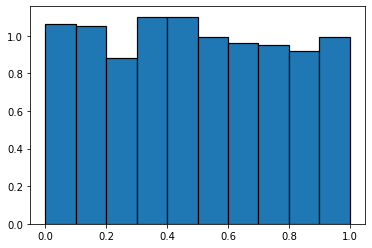

In [4]:
plt.hist(values,density=True, edgecolor='black', linewidth=1.2)
plt.show()

# THE IMPLEMENTATION OF THE ERDOS RENYI MODEL

In [5]:
# parameters
N=100
p=0.01

### the model loop version 1

In [6]:
# Initialization: Creation of N isolated nodes
G=nx.Graph()
nodes=[i for i in range(N)]
G.add_nodes_from(nodes)

#the cycle
for n1 in G.nodes():
    for n2 in G.nodes():
        if n1>n2:
            r=random.uniform(0,1)
            if r<p:
                G.add_edge(n1,n2)
        

In [7]:
print(G.number_of_nodes(),G.number_of_edges())

100 53


### the model loop version 2 - using itertools

In [8]:
list(itertools.combinations([1,2,3], 2) )

[(1, 2), (1, 3), (2, 3)]

In [9]:
# Initialization: Creation of N isolated nodes
G=nx.Graph()
nodes=[i for i in range(N)]
G.add_nodes_from(nodes)
allEdges=list(itertools.combinations(nodes, 2))

for (u,v) in allEdges:
    r=random.uniform(0,1)
    if r<p:
        G.add_edge(u,v)

In [10]:
print(G.number_of_nodes(),G.number_of_edges())

100 52


### The model implemented in nx

In [11]:
G=nx.erdos_renyi_graph(N,p)

In [12]:
G.number_of_edges()

53

# SEVERAL REPLICAS OF THE MODEL

To statistically study the model we need to build several replicas

In [13]:
# parameters
N=100
p=0.01

nRepl=10

In [14]:
listGraphs=[]
for i in range(nRepl):
    G=nx.erdos_renyi_graph(N,p)
    listGraphs.append(G)
    
# or listGraphs=[nx.erdos_renyi_graph(N,p) for i in range(nReplabs)]

In [15]:
for G in listGraphs:
    print(G.number_of_edges())

49
41
45
41
45
34
46
50
55
43


In [16]:
avNLinks=[]
for G in listGraphs:
    avNLinks.append(G.number_of_edges())
    
print (np.mean(avNLinks))

44.9


# A FIRST MEASURE: the number of links as a function of N

We fix the number of nodes

In [17]:
N=1000

p varies between 0.0001 and 0.1

In [18]:
pList=[0.0001,0.0005,0.001,0.005,0.01,0.03,0.05,0.07,0.1]

We should do at least 100 replicas, for calculation time we do 10

In [19]:
nRepl=10

### Model setup

We build a model (with several replicas) for each value of p. For all the values of the parameter p we want to observe resulting number of edges.

In [20]:
# the list of graphs is now a dictionary: I will have a list for each value of the parameter p
listGraphs={}

#loop on the values for the parameter p
for p in pList:
    print (p) #to be sure that I'm not too slow
    listGraphs[p]=[]
    #loop on the replicas
    for i in range(nRepl):
        G=nx.erdos_renyi_graph(N,p)
        listGraphs[p].append(G)

0.0001
0.0005
0.001
0.005
0.01
0.03
0.05
0.07
0.1


In [21]:
avL=[]
for p in pList:
    listE=[G.number_of_edges() for G in listGraphs[p]]
    avL.append(np.mean(listE))

In [22]:
avL

[49.4, 250.6, 501.4, 2505.2, 4998.3, 14973.1, 24997.3, 34993.4, 49921.7]

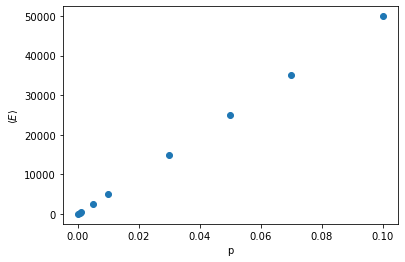

In [23]:
plt.plot(pList,avL,'o')

plt.xlabel('p')
plt.ylabel(r'$\langle E\rangle$')

plt.show()

In [24]:
coef = np.polyfit(pList,avL, 1)
poly1d_fn = np.poly1d(coef) 

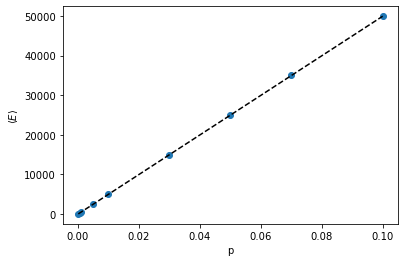

In [25]:
plt.plot(pList,avL,'o')
plt.plot(pList, poly1d_fn(pList), '--k')

plt.xlabel('p')
plt.ylabel(r'$\langle E\rangle$')

plt.show()

In [26]:
coef[0]

499432.3508101135

In [27]:
N*(N-1)/2

499500.0

# THE DEGREE DISTRIBUTION

In [28]:
NList=[100,500,1000,2000,5000,10000]
p=0.001

nRepl=10

In [29]:
# the list of graphs is now a dictionary: I will have a list for each value of the parameter N
listGraphs={}

#loop on the values for the parameter N
for N in NList:
    print (N) 
    listGraphs[N]=[]
    #loop on the replicas
    for i in range(nRepl):
        G=nx.erdos_renyi_graph(N,p)
        listGraphs[N].append(G)

100
500
1000
2000
5000
10000


In [30]:
# degree list for all the values of N:
degreeList={}
for N in NList:
    degreeList[N]=[]
    for G in listGraphs[N]:
        degreesReplica=[G.degree(n) for n in G.nodes()] 
        degreeList[N]=degreeList[N]+degreesReplica

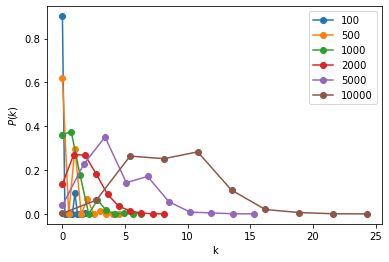

In [31]:
for N in NList:
    y,x=np.histogram(degreeList[N])
    ynorm=[i/sum(y) for i in y]
    plt.plot(x[:-1],ynorm,'o-',label=N)
plt.legend()
plt.xlabel('k')
plt.ylabel(r'$P(k)$')


plt.show()

# SMALL WORLD PROPERTIES

In [32]:
#we fix the average degree
avK=5
#This is the input list of the N values
NList=[100,300,500,800,1000,1500]

NREPL=2 
#to do a good job we should put a larger number of replicas

# the list of graphs is now a dictionary: I will have a list for each value of the parameter N
listGraphs={}

#loop on the values for the parameter N
for N in NList:
    prob=avK/N
    print (N) 
    listGraphs[N]=[]
    #loop on the replicas
    for i in range(nRepl):
        G=nx.erdos_renyi_graph(N,prob)
        listGraphs[N].append(G)

100
300
500
800
1000
1500


In [33]:
avShPath=[]
for N in NList:
    print(N)
    ll=[]
    for thisGraph in listGraphs[N]:
        if nx.is_connected(thisGraph):
            ll.append(nx.average_shortest_path_length(thisGraph))
        else:
            #extract the giant component
            Gcc = sorted(nx.connected_components(thisGraph), key=len, reverse=True)
            G0 = thisGraph.subgraph(Gcc[0])
            ll.append(nx.average_shortest_path_length(G0))
    avShPath.append(np.mean(ll))

100
300
500
800
1000
1500


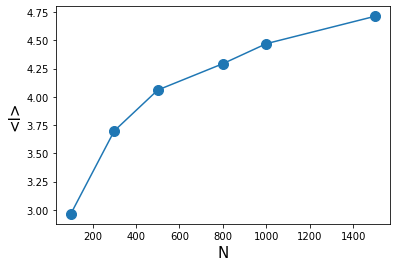

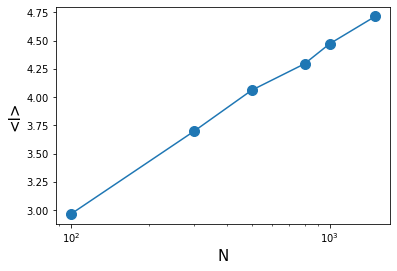

In [34]:
plt.plot(NList,avShPath,'o-',markersize=10)
plt.xlabel('N',size=15)
plt.ylabel('<l>',size=15)
plt.show()

#if <l>=log(N), in the semilog plane I should have a straight line 
plt.semilogx(NList,avShPath,'o-',markersize=10)
plt.xlabel('N',size=15)
plt.ylabel('<l>',size=15)
plt.show()